# Ernst Equation Derivation Taken From Exact Spacetimes by Griffiths Page 246 and Ernst's Original Papers
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021 Christmas Morning!

See page 246 of the following:

https://www.cambridge.org/core/books/exact-spacetimes-in-einsteins-general-relativity/48896A8900897F53BDAA917456E884D6

https://journals.aps.org/pr/abstract/10.1103/PhysRev.167.1175

https://journals.aps.org/pr/abstract/10.1103/PhysRev.168.1415

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.41.1197

https://arxiv.org/abs/2012.13462

In [5]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [6]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [7]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [8]:
f = Function('f')(rho,z)
f

In [9]:
gamma = Function('gamma')(rho,z)
gamma

In [10]:
A = Function('A')(rho,z)
A

In [11]:
lineElement = expand(-f*(dt - A*dphi)**2 + f**-1 * ( exp(2*gamma)*(drho**2 + dz**2)+ rho**2 * dphi**2 ))
lineElement

In [12]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [13]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [14]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0            A(ρ, z)⋅f(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ       2                          ⎥
⎢A(ρ, z)⋅f(ρ, z)      0       ─────── - A (ρ, z)⋅f(ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [15]:
import sympy

In [16]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0            A(ρ, z)⋅f(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ       2                          ⎥
⎢A(ρ, z)⋅f(ρ, z)      0       ─────── - A (ρ, z)⋅f(ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [17]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [19]:
metric = MetricTensor(m,syms)

In [20]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                             ∂                      2     
⎢⎢                                                             ──(f(ρ, z))   A(ρ, z)⋅f (ρ, z
⎢⎢                                                             ∂ρ                           
⎢⎢                    0                                        ─────────── + ───────────────
⎢⎢                                                              2⋅f(ρ, z)                   
⎢⎢                                                                                       2⋅ρ
⎢⎢                                                                                          
⎢⎢∂                      2       ∂                                                          
⎢⎢──(f(ρ, z))   A(ρ, z)⋅f (ρ, z)⋅──(A(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [21]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

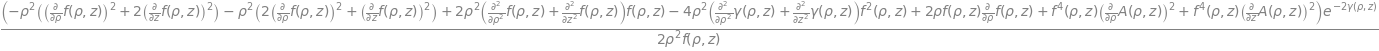

In [22]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [23]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [25]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [27]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [37]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

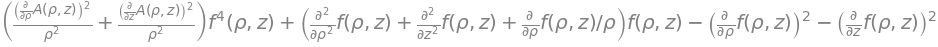

In [43]:
eq13pt7aGriffiths = collect(expand((1/rho**2)*ricciSimplified[0,0].args[2]),f)
eq13pt7aGriffiths

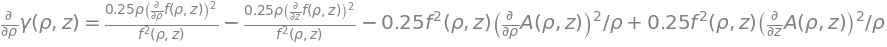

In [57]:
eq13pt8aGriffiths = Eq( diff(gamma,rho),expand(solve( einstinSimplified[3,3], diff(gamma,rho) )[0]) ) 
eq13pt8aGriffiths

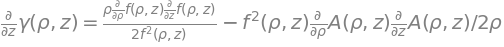

In [44]:
eq13pt8bGriffiths = Eq(diff(gamma,z),expand(solve( einstinSimplified[1,3], diff(gamma,z) )[0]))
eq13pt8bGriffiths

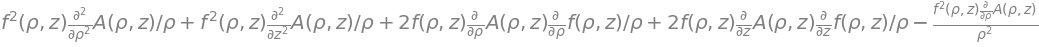

In [63]:
eq13pt7bTypedIn = diff( rho**-1 * f**2 * diff(A,rho) ,rho ) + diff( rho**-1 * f**2 * diff(A,z) ,z )
eq13pt7bTypedIn

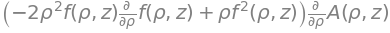

In [70]:
#  We look at five parts of this component of the Ricci Tensor this being the first 
collect( ricciSimplified[0,2].args[2], A ).args[0]

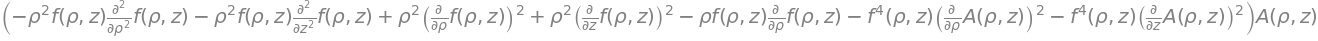

In [76]:
#  You can see if we set this part of the component equal to zero we will be left with the other terms.  So.. we subtract it out 
collect( ricciSimplified[0,2].args[2], A ).args[1]

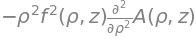

In [71]:
#  We look at five parts of this component of the Ricci Tensor this being the third 
collect( ricciSimplified[0,2].args[2], A ).args[2]

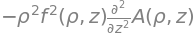

In [72]:
#  We look at five parts of this component of the Ricci Tensor this being the fourth 
collect( ricciSimplified[0,2].args[2], A ).args[3]

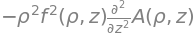

In [75]:
#  We look at five parts of this component of the Ricci Tensor this being the fifth 
collect( ricciSimplified[0,2].args[2], A ).args[3]

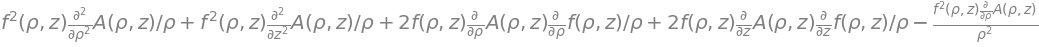

In [83]:
#  Here we subtract out the parts have A as a coefficient 
eq13pt7bGriffiths = expand((f/rho**2)*simplify( collect( ricciSimplified[0,2].args[2], A )-collect( ricciSimplified[0,2].args[2], A ).args[1]).args[2])
eq13pt7bGriffiths

In [84]:
#  The piece of the Ricci component we extracted is the same as the typed in equation from Griffiths 
eq13pt7bTypedIn == eq13pt7bGriffiths

True

In [86]:
vacuumFieldEquations = Matrix([eq13pt7aGriffiths,eq13pt7bGriffiths,eq13pt8aGriffiths,eq13pt8bGriffiths])
vacuumFieldEquations

⎡     ⎛             2                2⎞                                                     
⎢     ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟            ⎛                              ∂         
⎢     ⎜⎜──(A(ρ, z))⎟    ⎜──(A(ρ, z))⎟ ⎟            ⎜  2              2            ──(f(ρ, z)
⎢     ⎜⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎟  4         ⎜ ∂              ∂             ∂ρ        
⎢     ⎜────────────── + ──────────────⎟⋅f (ρ, z) + ⎜───(f(ρ, z)) + ───(f(ρ, z)) + ──────────
⎢     ⎜       2                2      ⎟            ⎜  2              2                 ρ    
⎢     ⎝      ρ                ρ       ⎠            ⎝∂ρ             ∂z                       
⎢                                                                                           
⎢           2                       2                                                       
⎢ 2        ∂              2        ∂                                                        
⎢f (ρ, z)⋅───(A(ρ, z))   f (ρ, z)⋅───(A(ρ, z))             ∂          